In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv


In [2]:
# Loading the dataset.
data= pd.read_csv("/kaggle/input/ann-car-sales-price-prediction/car_purchasing.csv", encoding='ISO-8859-1')
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [3]:
# Printing the dataset summary.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [4]:
#Lets see the deminsion of the dataset.
print(F"Rows ans column in the dataset:",data.shape)

Rows ans column in the dataset: (500, 9)


In [5]:
# Let see the columns names of the dataset.
data.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

In [6]:
#Removing the unwanted spaces from the column.
data.columns = data.columns.str.replace(' ', '_')

In [7]:
#Checking the null svalues in the dataset.
print(F"Null Values in the dataset",data.isnull().sum().sum())

Null Values in the dataset 0


In [8]:
# we have to chanage contiues values from Float to Int.
continues_col= ['age','annual_Salary', 'credit_card_debt', 'net_worth','car_purchase_amount']
data[continues_col] = data[continues_col].astype(int)

In [9]:
data.head()

,customer_name,customer_e-mail,country,gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41,62812,11609,238961,35321
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40,66646,9572,530973,45115
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43,53798,11160,638467,42925
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58,79370,14426,548599,67422
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57,59729,5358,560304,55915


In [10]:
#Dropping the columns 
data.drop(["customer_name","customer_e-mail","country"], axis=1, inplace=True)
data.head()

,gender,age,annual_Salary,credit_card_debt,net_worth,car_purchase_amount
0,0,41,62812,11609,238961,35321
1,0,40,66646,9572,530973,45115
2,1,43,53798,11160,638467,42925
3,1,58,79370,14426,548599,67422
4,1,57,59729,5358,560304,55915


In [11]:
#Spliting the dataset.
from sklearn.model_selection import train_test_split 

X= data.drop(["car_purchase_amount"], axis=1)
y= data["car_purchase_amount"].values.reshape(-1,1)

X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=2410)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(400, 5)
(400, 1)
(100, 5)
(100, 1)


In [12]:
# Let us scale the dataset(Min-Max Scaler)
from sklearn.preprocessing import MinMaxScaler

X_scaler= MinMaxScaler()
y_scaler= MinMaxScaler()

X_train_scaled= X_scaler.fit_transform(X_train)
X_test_scaled= X_scaler.transform(X_test)

y_train_scaled= y_scaler.fit_transform(y_train)
y_test_scaled= y_scaler.transform(y_test)

print(X_train_scaled.shape)
print(y_train_scaled.shape)
print(X_test_scaled.shape)
print(y_test_scaled.shape)

(400, 5)
(400, 1)
(100, 5)
(100, 1)


## Model Building

In [13]:
# Important Libraries.
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

2025-10-14 07:46:22.476249: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760427982.727925      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760427982.789142      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [14]:
model= Sequential()
model.add(Dense(64,input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(1))

2025-10-14 07:46:36.217123: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [15]:
#Let see the summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
#compileing the model.
model.compile(loss='mse',optimizer='adam',metrics=['mse'])

In [17]:
history=model.fit(X_train_scaled, y_train_scaled, epochs=300, batch_size=32, validation_split=0.2, verbose=0)
print("Training Completed!")

Training Completed!


In [18]:
#Prediction on unseen data
y_pred_scaled= model.predict(X_test_scaled)
y_pred= y_scaler.inverse_transform(y_pred_scaled)
y_test_orignal= y_scaler.inverse_transform(y_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [19]:
#Evaluate the Model
mse= mean_squared_error(y_test_orignal, y_pred)
rmse= np.sqrt(mse)
mae= mean_absolute_error(y_test_orignal, y_pred)
r2= r2_score(y_test_orignal, y_pred)

print(f"Model Evaluation:")
print(f"Mean Squared Error:", mse)
print(f"Root Mean Squared Error:", mae)
print(f"Mean Absolute Error:", mae)
print(f"R2 Score:",r2)

Model Evaluation:
Mean Squared Error: 168003.61597134665
Root Mean Squared Error: 333.17729492187556
Mean Absolute Error: 333.17729492187556
R2 Score: 0.9987549369409533


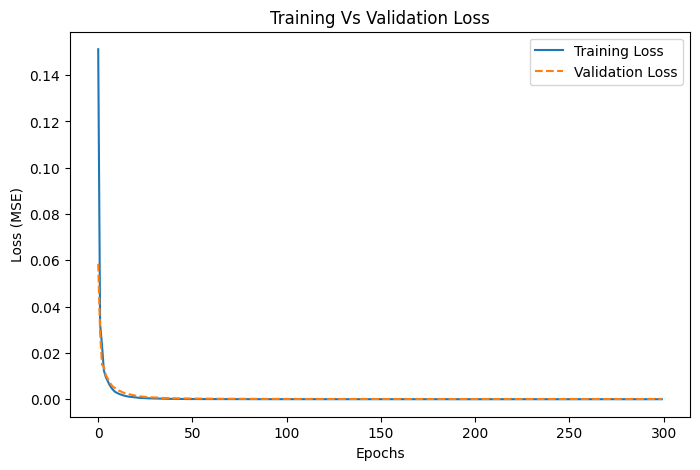

In [20]:
#Ploting Training Vs Validation Loss
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--')
plt.title('Training Vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

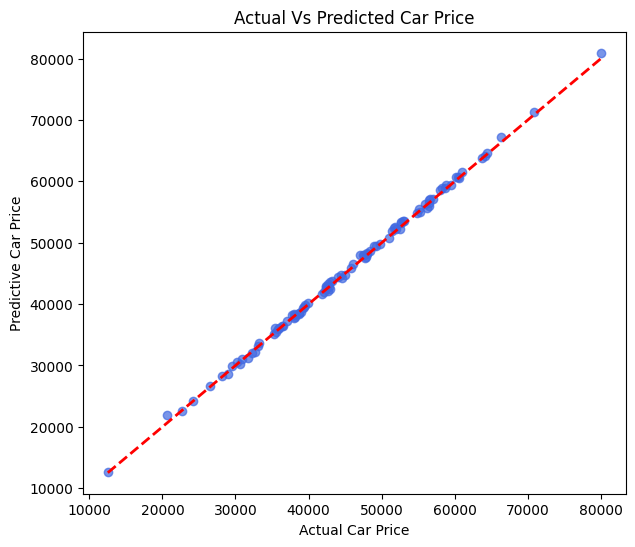

In [21]:
#Ploting Actual Vs Prediction
plt.figure(figsize=(7,6))
plt.scatter(y_test_orignal, y_pred, alpha=0.7, color='royalblue')
plt.plot([y_test_orignal.min(), y_test_orignal.max()],[y_test_orignal.min(), y_test_orignal.max()],'r--',lw=2)
plt.title('Actual Vs Predicted Car Price')
plt.xlabel('Actual Car Price')
plt.ylabel('Predictive Car Price')
plt.show()

In [22]:
#View a Comparision
compare= pd.DataFrame({'Actual': y_test_orignal.flatten(),
                       'Predictive': y_pred.flatten()})

compare.head()

,Actual,Predictive
0,46135.0,46592.511719
1,56510.0,56944.488281
2,51941.0,52152.714844
3,35321.0,35195.734375
4,59538.0,59367.343750
